## A.1 Import libraries

In [3]:
library(ggplot2)
suppressMessages(library(ggmap))
library(leaflet)
library(dplyr)

In [4]:
library(maps)
library(mapproj)

## A.2 Use API key

In [5]:
api_key = 'YOURAPIKEYHERE'
register_google(api_key)

# 1. Comparing Leaflet and ggmap

## 1.1 Leaflet

In [67]:
#Enter longitude and latitude
long = -76.948270
lat = 38.983640
# Creat map
leaflet() %>% 
  addProviderTiles("CartoDB") %>% 
  addMarkers(lng = long, lat = lat, popup = 'SPP')

HTML widgets cannot be represented in plain text (need html)

## 1.2 ggmaps

Source : https://maps.googleapis.com/maps/api/staticmap?center=38.98364,-76.94827&zoom=15&size=640x640&scale=1&maptype=terrain&language=en-EN&key=xxx


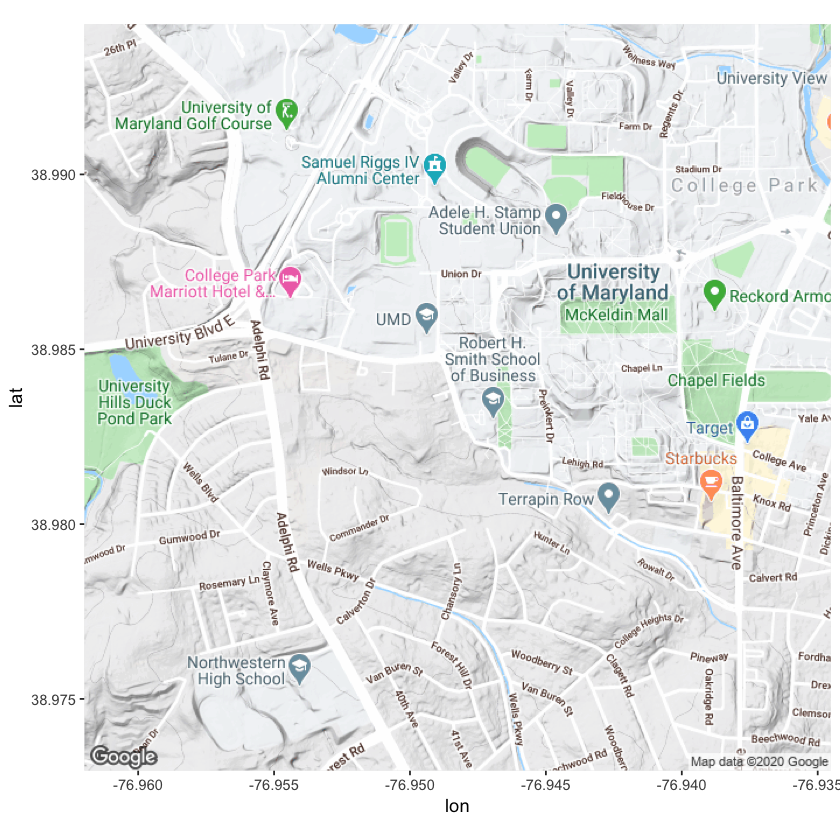

In [68]:
#Coordinates
spp = c(long = -76.948270, lat = 38.983640)
# Get map
map = get_map(spp, zoom = 15, scale = 1)
# Plot map
ggmap(map)

# 2. Mapping

In [ ]:
dfworldmap = map_data("world")
ggplot() + geom_polygon(aes(long,lat, group=group), 
                        fill="grey65", 
                 data=dfworldmap) + theme_bw() + ggtitle("Maps are cool")

## 2.1 Basics

### 2.1.1 All countries by long, lat

In [70]:
head(map_data("world"),2)

long      lat    group order region subregion
1 -69.89912 12.452 1     1     Aruba  NA       
2 -69.89571 12.423 1     2     Aruba  NA

#### 2.1.1.1 Search for country

In [71]:
dfworldmap = map_data("world")
dfworldmap %>% filter(region=='Indonesia') %>% head(2)

long     lat       group order region    subregion
1 122.9489 -10.90928 692   46747 Indonesia Roti     
2 122.8559 -10.90967 692   46748 Indonesia Roti

### 2.1.2 U.S. states data

In [72]:
us = map_data("state")
head(us,3)

long      lat      group order region  subregion
1 -87.46201 30.38968 1     1     alabama NA       
2 -87.48493 30.37249 1     2     alabama NA       
3 -87.52503 30.37249 1     3     alabama NA

## 2.2 Map from dataframe

In [73]:
data("USArrests")
arrest = USArrests %>% #create new df
  add_rownames("region") %>% # add a new var region
  #format data to work
  mutate(region=tolower(region)) #make it all lowercase

head(arrest) #check that we have our new var!

Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”

region     Murder Assault UrbanPop Rape
1 alabama    13.2   236     58       21.2
2 alaska     10.0   263     48       44.5
3 arizona     8.1   294     80       31.0
4 arkansas    8.8   190     50       19.5
5 california  9.0   276     91       40.6
6 colorado    7.9   204     78       38.7

Warning message:
“Ignoring unknown aesthetics: x, y”

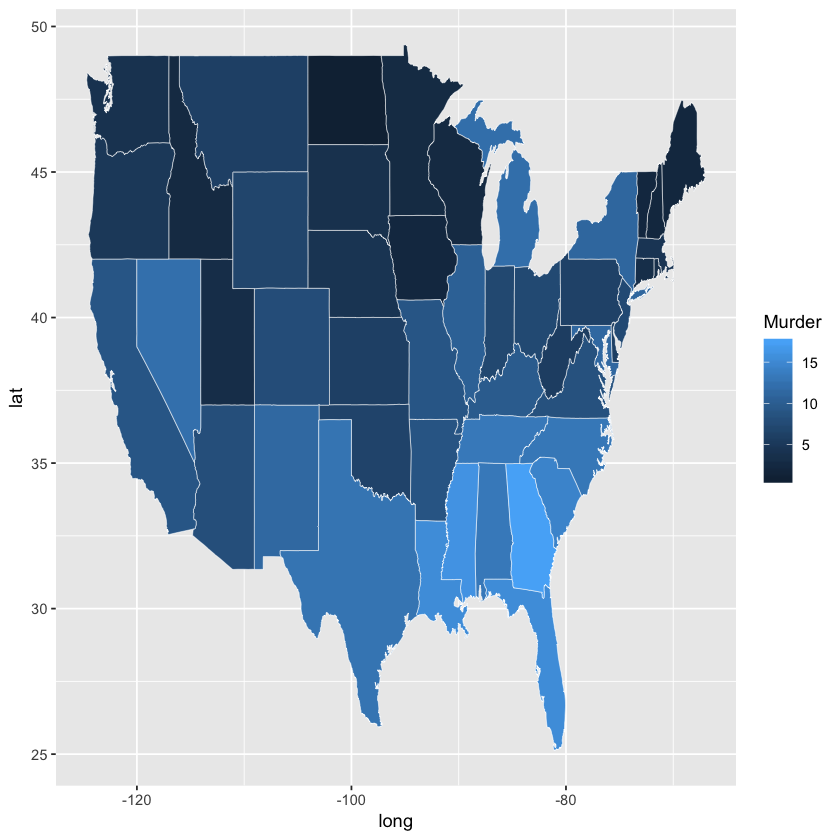

In [74]:
g = ggplot()
g = g + geom_map(data=us, map=us,
                    aes(x=long, y=lat, map_id=region),
                    fill="#ffffff", color="#ffffff", size=0.15)
g = g + geom_map(data=arrest, map=us,
                    aes(fill=Murder, map_id=region),
                    color="#ffffff", size=0.15)
g

# 3. get_map

## 3.1 European map

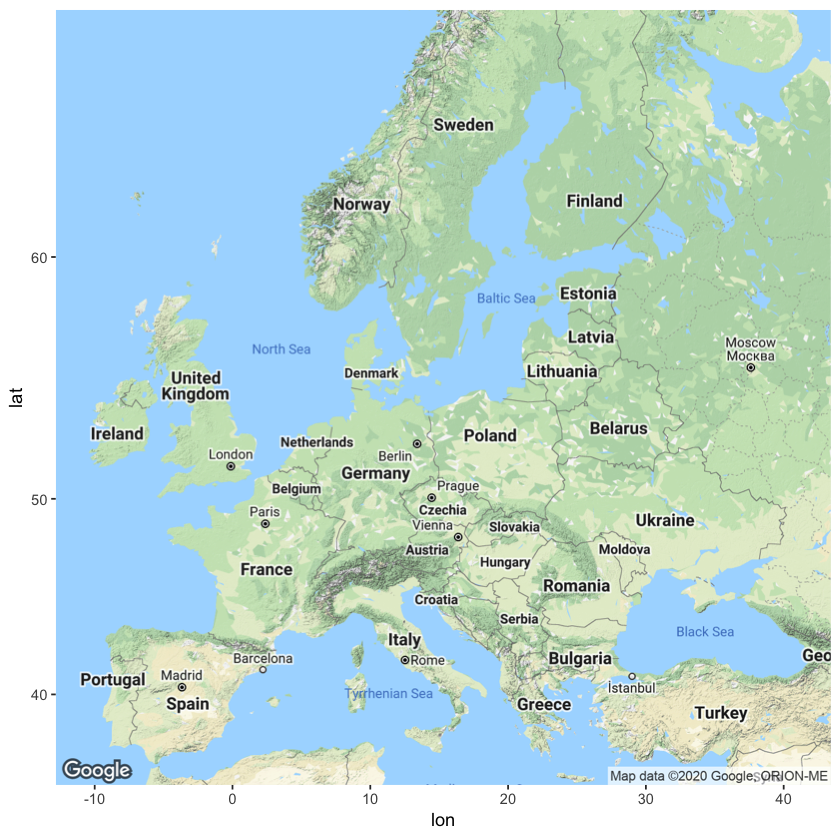

In [80]:
map = (get_map(location = 'Europe', zoom = 4)
ggmap(map)

### 3.1.1 European map with locations

In [81]:
europegps = suppressMessages(geocode(c(
                        "Lisbon, Portugal", 
                         "Eiffel Tower", 
                        "Berlin, Germany",
                         "Crimea, Ukraine"), source="google"))
europegps

lon       lat     
1 -9.139337 38.72225
2  2.294481 48.85837
3 13.404954 52.52001
4 34.499727 45.34530

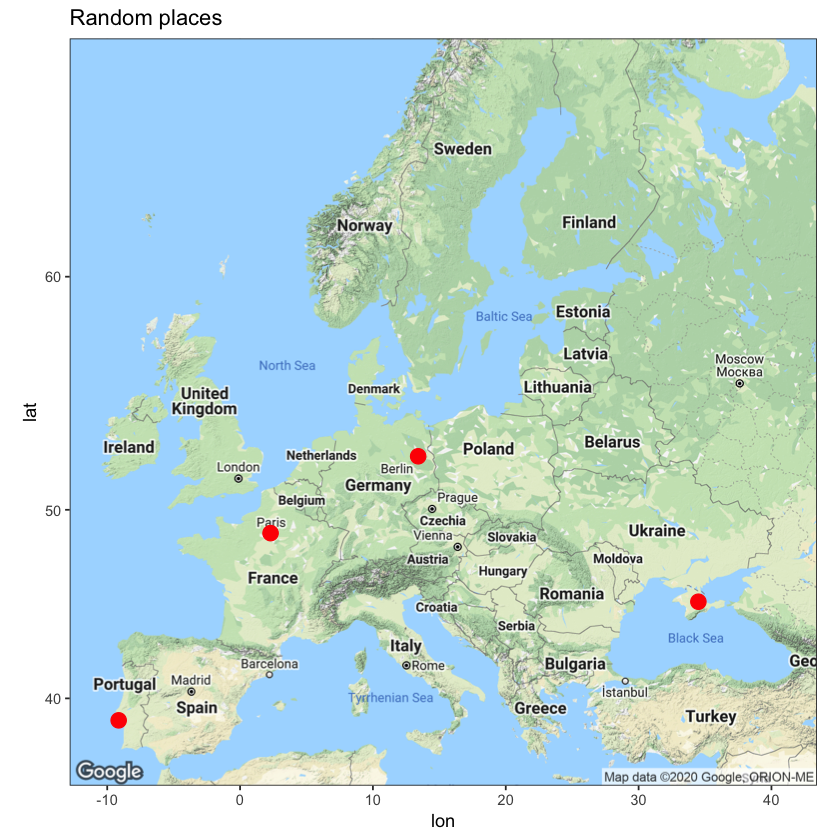

In [83]:
ggmap(map) + geom_point(aes(x=europegps$lon, 
                            y = europegps$lat),  lwd = 4, colour = "red") + ggtitle("Random places") + theme_bw()

## 3.2 get_googlemap

Source : https://maps.googleapis.com/maps/api/staticmap?center=Japan&zoom=5&size=640x640&scale=2&maptype=terrain&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Japan&key=xxx


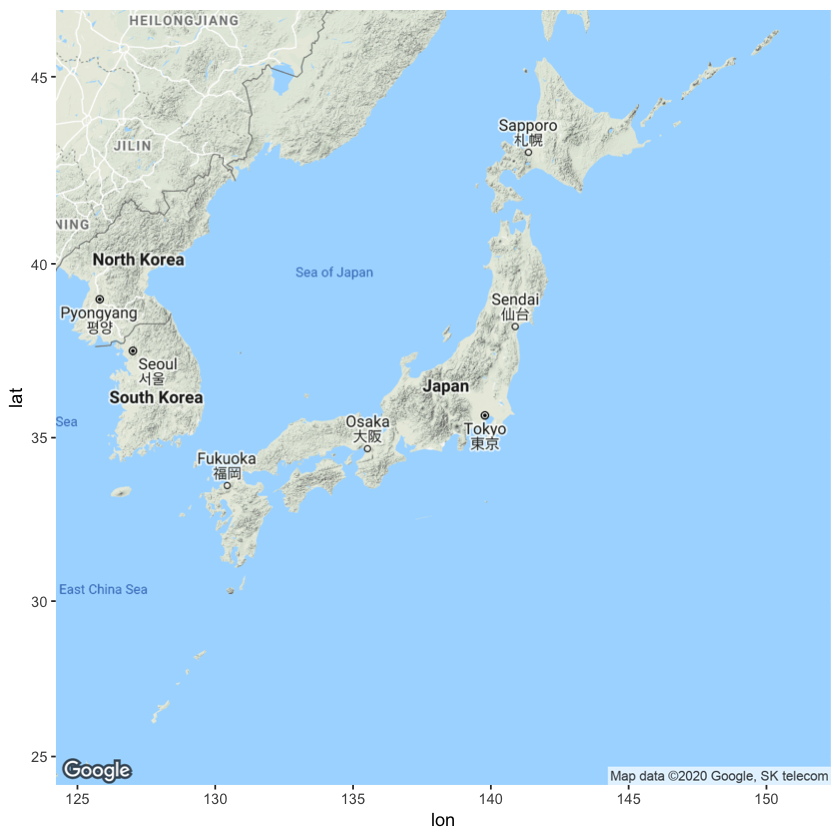

In [86]:
get_googlemap("Japan", zoom = 5) %>% ggmap()
